In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [9]:
# Read data
df = pd.read_csv(filepath_or_buffer="../data/agri/minnesota_county_yearly_agricultural_production.csv")
df.head(10)

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1950,AITKIN,BARLEY,BARLEY,600,"16,200",27.0
1,1950,AITKIN,CORN,"CORN, GRAIN","4,800","72,000",15.0
2,1950,AITKIN,FLAXSEED,FLAXSEED,"1,000","7,000",7.0
3,1950,AITKIN,HAY,HAY,"49,200",NaN,NaN
4,1950,AITKIN,OATS,OATS,"7,900","213,300",27.0
5,1950,AITKIN,RYE,RYE,50,750,15.0
6,1950,AITKIN,SOYBEANS,SOYBEANS,100,700,7.0
7,1950,AITKIN,WHEAT,WHEAT,150,"1,980",13.2
8,1950,AITKIN,WHEAT,"WHEAT, SPRING, (EXCL DURUM)",30,540,18.0
9,1950,AITKIN,WHEAT,"WHEAT, SPRING, DURUM",10,120,12.0


In [10]:
def string_to_num(x: str) -> np.float64:
    """Returns float value of a string rempresented number
       where the decimal separator is ','.
       If a problem is encountered, nan is returned.

       Note: filling with nan is more handy, as it can be
       later filled with either mean, 0 or any custom values.

    Args:
        x (str): String number

    Returns:
        np.float64: converted number
    """
    try:
        x = x.replace(",", "")
        if x == 'NaN':
            return np.nan
        else:
            return np.float64(x)
    except:
        if type(x).__name__ == "float":
            return x
        else:
            return np.nan
        
# Process numeric column
df["ACRES HARVESTED"] = df["ACRES HARVESTED"].apply(lambda x: string_to_num(x))
df["PRODUCTION, MEASURED IN BU"] = df["PRODUCTION, MEASURED IN BU"].apply(lambda x: string_to_num(x))
df["YIELD, MEASURED IN BU / ACRE"] = df["YIELD, MEASURED IN BU / ACRE"].apply(lambda x: string_to_num(x))

df.head(10)

,Year,County,Commodity,Crop,ACRES HARVESTED,"PRODUCTION, MEASURED IN BU","YIELD, MEASURED IN BU / ACRE"
0,1950,AITKIN,BARLEY,BARLEY,600.0,16200.0,27.0
1,1950,AITKIN,CORN,"CORN, GRAIN",4800.0,72000.0,15.0
2,1950,AITKIN,FLAXSEED,FLAXSEED,1000.0,7000.0,7.0
3,1950,AITKIN,HAY,HAY,49200.0,NaN,NaN
4,1950,AITKIN,OATS,OATS,7900.0,213300.0,27.0
5,1950,AITKIN,RYE,RYE,50.0,750.0,15.0
6,1950,AITKIN,SOYBEANS,SOYBEANS,100.0,700.0,7.0
7,1950,AITKIN,WHEAT,WHEAT,150.0,1980.0,13.2
8,1950,AITKIN,WHEAT,"WHEAT, SPRING, (EXCL DURUM)",30.0,540.0,18.0
9,1950,AITKIN,WHEAT,"WHEAT, SPRING, DURUM",10.0,120.0,12.0


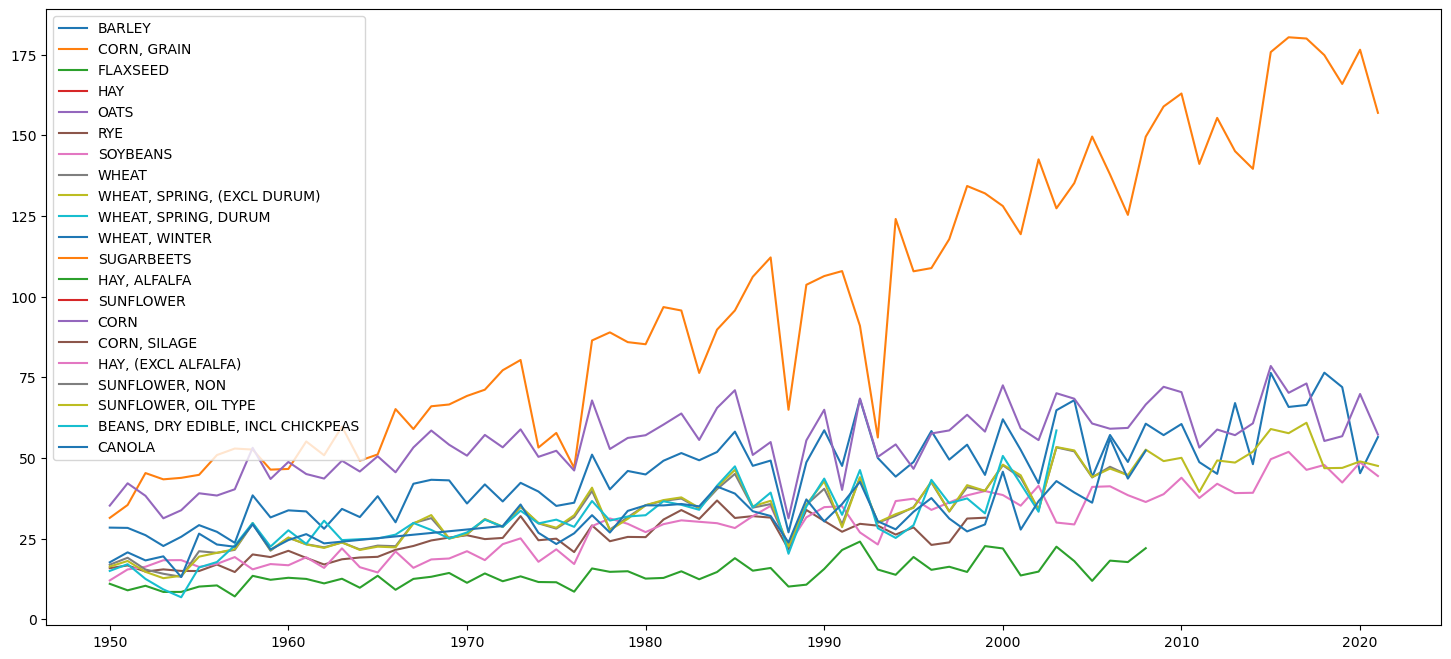

In [11]:
grouped = df.groupby(['Year', 'Crop'])['YIELD, MEASURED IN BU / ACRE'].mean().reset_index()

# set the figure size
plt.figure(figsize=(18, 8))

# plot the data
for crop in grouped['Crop'].unique():
    data = grouped[grouped['Crop'] == crop]
    plt.plot(data['Year'], data['YIELD, MEASURED IN BU / ACRE'], label=crop)

plt.legend()
plt.show()